# <올리스트 데이터 분석 전처리 - APPRU / Retention / R_ratio >

dataset 병합
예상되는 분석내용
- APPRU
- 재구매율(리텐션) 분석
- 잔존율 (retention ratio) 분석

## 라이브러리 로드

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## 폰트 로드

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

## 데이터로드

In [4]:
import glob

In [5]:
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [6]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

In [7]:
# 모든 행과 열 나오게 조정 
pd.options.display.max_columns = None
# pd.options.display.max_rows = None -> 모든 열 출력

In [8]:
# import 한 데이터를 merge 하기 
# merge 해주는 이유는 merge 함수는 두 데이터 프레임을 각 데이터에 존재하는 고유값(key) 기준으로 병합할 때 사용한다.
# pd.merge(df_left, df_right, how='inner', on=None)이 default 
# on=None은 두 데이터의 공통열이름(key값) 기준으로 innerjoin  한다는 의미임 
# how = 'outer' 옵션이 붙으면 key 값기준으로 합치되 어느 한쪽에라도 없는 데이터가 있는 경우 NAN 값이 지정된다. 

In [9]:
# 하단 두개의 데이터셋은 병합에서 제외. 일단 고객 분석이 먼저니까 
# df_geolocation = pd.read_csv(path[1])
# df_sellers = pd.read_csv(path[7])

In [10]:
df = df_customers.merge(df_orders, on = 'customer_id', how = 'left')
df = df.merge(df_items, on ='order_id', how = 'outer')
df = df.merge(df_products, on ='product_id', how ='outer')
df = df.merge(df_category, on ='product_category_name', how ='outer')

## 데이터 미리보기 및 요약

In [11]:
df.shape

(113425, 27)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113425 non-null  object 
 1   customer_unique_id             113425 non-null  object 
 2   customer_zip_code_prefix       113425 non-null  int64  
 3   customer_city                  113425 non-null  object 
 4   customer_state                 113425 non-null  object 
 5   order_id                       113425 non-null  object 
 6   order_status                   113425 non-null  object 
 7   order_purchase_timestamp       113425 non-null  object 
 8   order_approved_at              113264 non-null  object 
 9   order_delivered_carrier_date   111457 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  113425 non-null  object 
 12  order_item_id                 

In [13]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [14]:
df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
113420,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
113421,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
113422,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,nova iguacu,RJ,ee86b68eb9222b0cad7da50f4f758a35,delivered,2017-05-17 17:44:34,2017-05-17 17:55:12,2017-05-18 16:28:06,2017-05-20 08:44:01,2017-06-09 00:00:00,1.0,0ab3ab3b2869073aa9afe795fe9151aa,28ea411b354f14b1a494be4e79f0ce02,2017-05-24 17:55:12,110.00,14.52,fashion_roupa_infanto_juvenil,52.0,494.0,4.0,600.0,36.0,10.0,26.0,fashion_childrens_clothes
113423,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07 00:00:00,1.0,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,2017-01-30 11:09:00,183.29,25.77,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,security_and_services
113424,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,71940,brasilia,DF,bede3503afed051733eeb4a84d1adcc5,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,2017-09-28 18:14:35,2017-10-11 00:00:00,1.0,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,seguros_e_servicos,48.0,461.0,4.0,400.0,26.0,22.0,11.0,security_and_services


## 중복데이터 확인

In [15]:
# 중복되는 데이터 없는걸로 확인 
df.duplicated().sum()

0

## 결측치 확인

In [16]:
df.isna().mean() * 100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
order_id                         0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.141944
order_delivered_carrier_date     1.735067
order_delivered_customer_date    2.846815
order_estimated_delivery_date    0.000000
order_item_id                    0.683271
product_id                       0.683271
seller_id                        0.683271
shipping_limit_date              0.683271
price                            0.683271
freight_value                    0.683271
product_category_name            2.096540
product_name_lenght              2.096540
product_description_lenght       2.096540
product_photos_qty               2.096540
product_weight_g                 0.699140
product_length_cm                0

In [17]:
df.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
78654,9915051c0eb60afd11c7a49cb9ea8f8e,f1577fe8a499651c3de5f2221dde3e90,88040,florianopolis,SC,7e131886d59cb8a02c847ed61228fd8c,delivered,2017-03-20 18:25:04,2017-03-20 18:25:04,2017-03-21 08:26:42,2017-04-10 14:55:49,2017-04-06 00:00:00,1.0,fd9222f5293048868b832e5179fa3ec5,a3a38f4affed601eb87a97788c949667,2017-03-24 18:25:04,49.9,11.74,bebes,55.0,973.0,2.0,2950.0,32.0,22.0,16.0,baby
36424,0852444fb5c616452aa079549f38ca5e,d00a016616637f1fcf31fd087d393e8a,83206,paranagua,PR,443927ed7bbf7df399ca64efdb0b684c,delivered,2017-11-25 05:31:18,2017-11-25 06:33:29,2017-12-01 17:41:59,2017-12-09 01:52:19,2017-12-20 00:00:00,2.0,e5989cd466f0714e1439b95bf6a279da,1025f0e2d44d7041d6cf58b6550e0bfa,2017-12-01 06:33:29,54.0,15.13,moveis_decoracao,31.0,471.0,1.0,1200.0,20.0,20.0,20.0,furniture_decor
16387,57fd533504f8465baa7d22a08b659f9e,c7bf8f8c92f3dc02e746be6a5c8fad5b,1259,sao paulo,SP,889508c3700be6eebc597a173a99c250,delivered,2018-02-03 19:28:45,2018-02-04 00:09:40,2018-02-08 20:58:07,2018-02-18 12:50:59,2018-03-05 00:00:00,1.0,edfa4e50fd451a55d8c18fb7344d2c35,67225bff54a172ff67579aaf583efd78,2018-02-08 00:09:40,19.0,15.10,esporte_lazer,54.0,120.0,1.0,300.0,20.0,10.0,15.0,sports_leisure


# 리텐션 분석을 하기위한 서브셋 설정

## 그 전에 구매 취소건 먼저 제외 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    113425 non-null  object 
 1   customer_unique_id             113425 non-null  object 
 2   customer_zip_code_prefix       113425 non-null  int64  
 3   customer_city                  113425 non-null  object 
 4   customer_state                 113425 non-null  object 
 5   order_id                       113425 non-null  object 
 6   order_status                   113425 non-null  object 
 7   order_purchase_timestamp       113425 non-null  object 
 8   order_approved_at              113264 non-null  object 
 9   order_delivered_carrier_date   111457 non-null  object 
 10  order_delivered_customer_date  110196 non-null  object 
 11  order_estimated_delivery_date  113425 non-null  object 
 12  order_item_id                 

In [19]:
df.shape

(113425, 27)

In [20]:
# df['order_status'] 에 canceled 아닌거만
# You can use the invert (~) operator (which acts like a not for boolean data):
df_valid = df[~df['order_status'].str.contains('canceled')]
df_valid.shape

(112719, 27)

In [21]:
# canceled 제거 되었는지 확인 . 완벽 ~ 
df_valid['order_status'].unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved',
       'unavailable', 'created'], dtype=object)

In [22]:
#  중복데이터 제거
df_valid.drop_duplicates(keep = 'last')
df_valid.shape
# 중복데이터 없음 

(112719, 27)

In [23]:
df_valid

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
113421,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
113422,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,nova iguacu,RJ,ee86b68eb9222b0cad7da50f4f758a35,delivered,2017-05-17 17:44:34,2017-05-17 17:55:12,2017-05-18 16:28:06,2017-05-20 08:44:01,2017-06-09 00:00:00,1.0,0ab3ab3b2869073aa9afe795fe9151aa,28ea411b354f14b1a494be4e79f0ce02,2017-05-24 17:55:12,110.00,14.52,fashion_roupa_infanto_juvenil,52.0,494.0,4.0,600.0,36.0,10.0,26.0,fashion_childrens_clothes
113423,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dc

## APRU 분석

In [24]:
# ARPU ; 가입한 서비스에 대해 가입자 1명이 특정 기간 동안 지출한 평균 금액
# 공식 = 매출 / 중복을 제외한 순수 활동 사용자 수
df_valid['price'].sum() /df_valid['customer_unique_id'].nunique()
# 고객 1명당 평균 141헤알(포르투갈어: real brasileiro은 브라질의 통화단위)

141.23491450397657

In [25]:
# 고객 별 구매 빈도수 구매 (customer_unique_id 별  order_id 빈도수)
cust_agg = df_valid.groupby('customer_unique_id').agg({'price' : ['mean', 'sum'],
                                                 'order_id' : 'count'})
cust_agg

price          order_id
                                    mean      sum    count
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2  129.90   129.90        1
0000b849f77a49e4a4ce2b2a4ca5be3f   18.90    18.90        1
0000f46a3911fa3c0805444483337064   69.00    69.00        1
0000f6ccb0745a6a4b88665a16c9f078   25.99    25.99        1
0004aac84e0df4da2b147fca70cf8255  180.00   180.00        1
...                                  ...      ...      ...
fffcf5a5ff07b0908bd4e2dbc735a684  785.00  1570.00        2
fffea47cd6d3cc0a88bd621562a9d061   64.89    64.89        1
ffff371b4d645b6ecea244b27531430a   89.90    89.90        1
ffff5962728ec6157033ef9805bacc48  115.00   115.00        1
ffffd2657e2aad2907e67c3e9daecbeb   56.99    56.99        1

[95560 rows x 3 columns]

In [26]:
# 멀티인덱스 색인
cust_agg.columns = ["mean_price", "sum_price", "count"]

In [27]:
# 고객별(CustomerID) 기술통계 값을 확인
cust_agg.describe()

,mean_price,sum_price,count
count,94989.000000,95560.000000,95560.000000
mean,126.270944,141.234915,1.179563
std,190.887263,215.728209,0.619519
min,0.850000,0.000000,1.000000
25%,42.900000,46.400000,1.000000
50%,79.000000,89.000000,1.000000
75%,139.900000,154.000000,1.000000
max,6735.000000,13440.000000,24.000000


고객 한명당 평균 1.18개의 주문  /  주문당 141헤알씩 지출  / 상품 평균가격은 126헤알 

파레토의 법칙이 맞는듯? count max 24 / mean 1.18 -> 80 / 20의 법칙 적용되는듯  

## MAU(Monthly Active User)

df['year_month'] 컬럼 dt 라이브러리 이용해서 추출 

In [28]:
# dtypes: object -> datetime
df_valid['order_purchase_timestamp'] = pd.to_datetime(df_valid['order_purchase_timestamp'])

In [29]:
df_valid['order_purchase_timestamp']

0        2017-05-16 15:05:35
1        2017-11-09 00:50:13
2        2017-11-09 00:50:13
3        2017-05-07 20:11:26
4        2018-02-03 19:45:40
                 ...        
113420   2018-03-07 17:42:06
113421   2017-10-08 23:51:49
113422   2017-05-17 17:44:34
113423   2017-01-26 11:09:00
113424   2017-09-17 16:51:43
Name: order_purchase_timestamp, Length: 112719, dtype: datetime64[ns]

In [30]:
# 문자열 슬라이싱으로 year_month 추출 
df_valid['year_month'] = df_valid['order_purchase_timestamp'].astype(str).str[:7]

In [31]:
# df['year_month']로 그룹화 하여 customer_unique_id의 유일값 갯수구하기 
df_valid.groupby('year_month')['customer_unique_id'].nunique()

year_month
2016-09       2
2016-10     297
2016-12       1
2017-01     763
2017-02    1738
2017-03    2609
2017-04    2354
2017-05    3599
2017-06    3166
2017-07    3920
2017-08    4223
2017-09    4192
2017-10    4537
2017-11    7396
2017-12    5594
2018-01    7133
2018-02    6498
2018-03    7093
2018-04    6867
2018-05    6790
2018-06    6110
2018-07    6190
2018-08    6387
2018-09       1
Name: customer_unique_id, dtype: int64

In [32]:
y_m = df_valid.groupby('year_month')['customer_unique_id'].nunique()

<AxesSubplot:xlabel='year_month'>

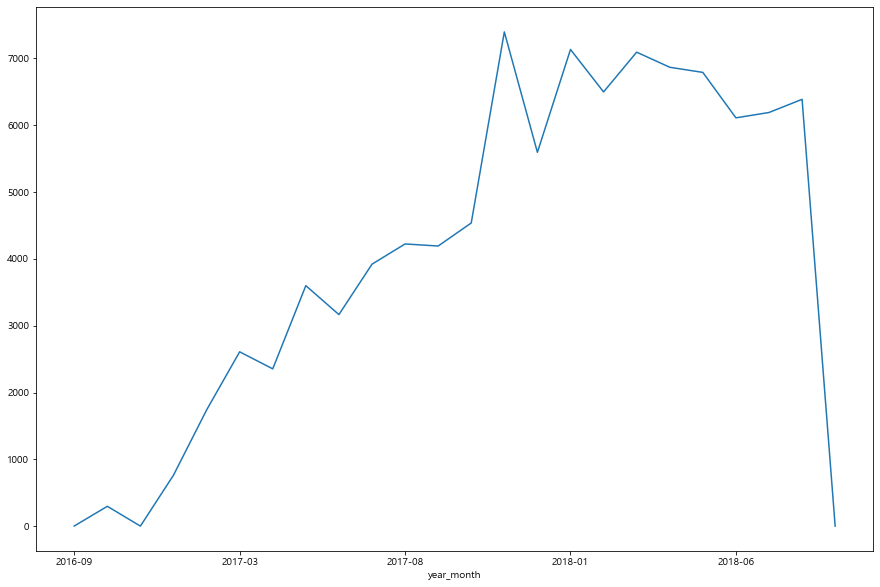

In [33]:
# 라인그래프로 시각화 
plt.figure(figsize = (15,10))
y_m.plot()
# 1년간 급성장  -> 2017.11~12 주문건 폭발 -> 1주년 이벤트?

## 월 별, 주문건, 중복을 제외한 주문제품 종류 수, 고객 수, 총 주문금액

In [34]:
df_valid.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-11
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-11
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2017-05
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,2018-02


In [35]:
ym_sale = df_valid.groupby('year_month').agg({'product_category_name' : 'nunique',
                                            'customer_unique_id' : 'nunique',
                                              'order_id' : 'nunique',
                                            'price' : ('sum','mean')}).style.format("{:,.0f}") 
ym_sale

In [36]:
# 한달에 두번이상 주문하는 고객이 있는 듯 (customer_unique_id.nunique != order_id)
# 이 그룹바이에서는 다음달 재구매의 여부는 알 수 없음. 같은 달 안에서는 두번 이상 구매하는 고객 있음

In [37]:
# get_month_day1() 함수를 통해 " 연도-월-1 " 형식으로 만듭니다.
# 일자를 " 1 "로 통일화한 이유는 월별 잔존률을 구하기 위해서 입니다.(월 단위)
def get_month_day1(x): 
    return dt.datetime(x.year, x.month, 1)

In [38]:
df_valid['order_purchase_timestamp'].iloc[0]

Timestamp('2017-05-16 15:05:35')

In [39]:
get_month_day1(df_valid['order_purchase_timestamp'].iloc[0])

datetime.datetime(2017, 5, 1, 0, 0)

In [40]:
df_valid['해당구매월'] = df_valid['order_purchase_timestamp'].map(get_month_day1)
df_valid[['order_purchase_timestamp','해당구매월']].sample(5)

,order_purchase_timestamp,해당구매월
14572,2018-06-19 17:05:20,2018-06-01
90376,2018-07-28 15:50:13,2018-07-01
107625,2018-04-08 20:35:57,2018-04-01
80053,2018-03-31 10:47:09,2018-03-01
100612,2017-07-04 06:34:10,2017-07-01


In [41]:
# transform을 사용하여 retention 분석 하기 !!!!
df_valid.groupby("customer_unique_id")["해당구매월"].transform("min")
# ["해당구매월"].transform("min")은 중복값 제외하고 몇월에 고객 아이디 별 처음 구매가 이루어졌는지를 보는거임\
# = 이걸 첫 구매월 컬럼으로 할당 

0        2017-05-01
1        2017-11-01
2        2017-11-01
3        2017-05-01
4        2018-02-01
            ...    
113420   2018-03-01
113421   2017-10-01
113422   2017-05-01
113423   2017-01-01
113424   2017-09-01
Name: 해당구매월, Length: 112719, dtype: datetime64[ns]

In [42]:
df_valid['첫구매월'] = df_valid.groupby("customer_unique_id")["해당구매월"].transform("min")

In [43]:
# 고객 아이디 별 퍼쳐스 타임스탬프에 적힌 구매 년/월이 해당구매월 /    
# 첫 구매월은 고객아이디생성된 이래로 첫 구매가 이루어진 날
df_valid[['customer_unique_id','order_purchase_timestamp','해당구매월','첫구매월']]

,customer_unique_id,order_purchase_timestamp,해당구매월,첫구매월
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,2017-05-01,2017-05-01
1,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,2017-11-01,2017-11-01
2,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,2017-11-01,2017-11-01
3,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,2017-05-01,2017-05-01
4,23397e992b09769faf5e66f9e171a241,2018-02-03 19:45:40,2018-02-01,2018-02-01
...,...,...,...,...
113420,a1d53377ab83871b0ad483b03ac69d6c,2018-03-07 17:42:06,2018-03-01,2018-03-01
113421,f979a07fc18b2af3780a796ba14b96f4,2017-10-08 23:51:49,2017-10-01,2017-10-01
113422,1b553902a5bbe6ee54a3aaa7cbfb6816,2017-05-17 17:44:34,2017-05-01,2017-05-01
113423,d8bee9ec375c3a0f9ef8ed7456a51dcd,2017-01-26 11:09:00,2017-01-01,2017-01-01


### 그래서 첫 구매일자와  최근 구매일자 사이의 interval

In [44]:
# 연도별 차이( year_diff )와 월별 차이( month_diff )를 구합니다.

year_diff = df_valid["해당구매월"].dt.year - df_valid["첫구매월"].dt.year
month_diff = df_valid["해당구매월"].dt.month - df_valid["첫구매월"].dt.month

In [45]:
# 몇 달이 차이가 나는지
# " 연도차이 * 12개월 + 월차이 + 1 "로 첫 구매 후 몇달 후 구매인지 알 수 있도록 CohortIndex 변수를 생성합니다.
# 2010-12-01부터 2011-12-01의 데이터를 기반으로 진행되어 CohortIndex 변수의 최소값은 1이며, 최대값 13입니다.
# df_valid["CohortIndex"] == df_valid["몇달째구매"]
df_valid["몇달째구매"]  = ( year_diff * 12) + month_diff + 1 #12달이니까 ~! 
df_valid["몇달째구매"]

0         1
1         1
2         1
3         1
4         1
         ..
113420    1
113421    1
113422    1
113423    1
113424    1
Name: 몇달째구매, Length: 112719, dtype: int64

In [46]:
df_valid["몇달째구매"].unique()
# 첫 구매 이후 21달 된 달에 구매한 고객도 있네 

array([ 1,  3,  2,  6,  7,  4,  9, 13,  5, 11,  8, 12, 15, 10, 16, 14, 17,
       20, 18, 21], dtype=int64)

In [47]:
# CohortIndex 값으로 월별 잔존 구매에 대한 빈도수를 구합니다.
# 회원가입 후 월별 구매 빈도수ㅠ를 value_counts 로 구합니다.
df_valid["몇달째구매"].value_counts()
# 회원가입 후 1달내에 재구매가 제일 많음 

1     110315
2        537
3        380
4        255
5        227
6        171
7        168
8        138
9        104
10        98
11        95
12        70
13        43
15        29
14        29
16        27
18        17
17        11
20         3
21         2
Name: 몇달째구매, dtype: int64

## 코호트 분석 시각화 - 첫 구매 이후 월 별 재구매횟수

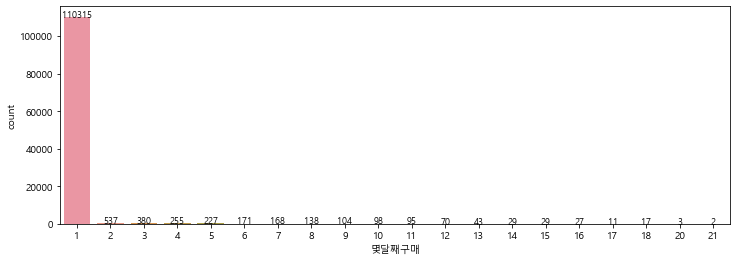

In [48]:
# 첫 구매 이후 월 별 재구매횟수 알고 싶으면... 
plt.figure(figsize=(12, 4))
total = len(df_valid) 
ax = sns.countplot(data = df_valid, x = '몇달째구매') 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
    # 첫달만 많고 계속 ㅠ  리텐션 관리가 엉망

## 잔존빈도 구하기 

In [49]:
cohort_count = df_valid.groupby(['첫구매월', '몇달째구매'])['customer_unique_id'].nunique().unstack()
cohort_count

몇달째구매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
첫구매월,,,,,,,,,,,,,,,,,,,,
2016-09-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,297.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12-01,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02-01,1735.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03-01,2603.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04-01,2334.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,4.0,NaN,NaN,NaN
2017-05-01,3571.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,10.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06-01,3126.0,14.0,11.0,13.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [50]:
cohort_count.fillna(0)

몇달째구매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
첫구매월,,,,,,,,,,,,,,,,,,,,
2016-09-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-01,297.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0
2016-12-01,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01,762.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,0.0
2017-02-01,1735.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,0.0,0.0
2017-03-01,2603.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,0.0,0.0
2017-04-01,2334.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,4.0,0.0,0.0,0.0
2017-05-01,3571.0,17.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,10.0,9.0,12.0,9.0,1.0,7.0,8.0,0.0,0.0,0.0,0.0
2017-06-01,3126.0,14.0,11.0,13.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0


In [51]:
cohort_count.index = cohort_count.index.astype(str)
# 날짜를 문자로 바꿔줌 !~~~ 

<AxesSubplot:xlabel='몇달째구매', ylabel='첫구매월'>

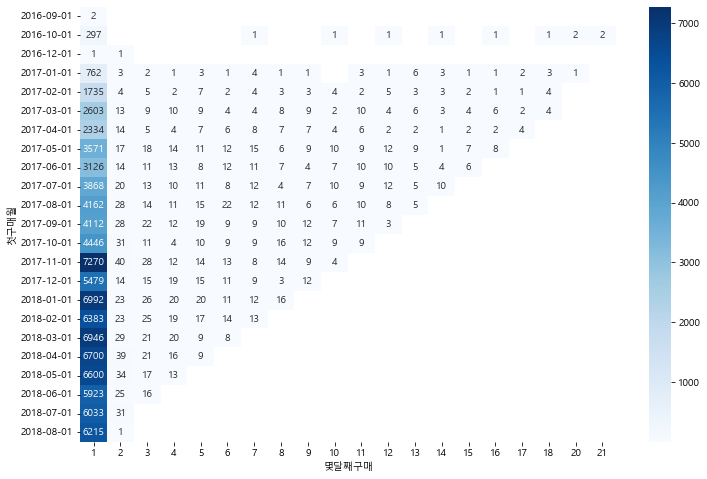

In [52]:
# 매트릭스는 히트맵으로 시각화 해주는 것이 효과적임
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, annot = True, 
            cmap = 'Blues', fmt = '.0f')

### 위 히트맵이 의미하는건 : olist는 리텐션 관리가 되고있지 않음

## 월별 신규 고객 유입수

In [53]:
# 히트맵 1번컬럼 !  왜? 신규고객이면서 첫구매니까 
cohort_count[1]

첫구매월
2016-09-01       2.0
2016-10-01     297.0
2016-12-01       1.0
2017-01-01     762.0
2017-02-01    1735.0
2017-03-01    2603.0
2017-04-01    2334.0
2017-05-01    3571.0
2017-06-01    3126.0
2017-07-01    3868.0
2017-08-01    4162.0
2017-09-01    4112.0
2017-10-01    4446.0
2017-11-01    7270.0
2017-12-01    5479.0
2018-01-01    6992.0
2018-02-01    6383.0
2018-03-01    6946.0
2018-04-01    6700.0
2018-05-01    6600.0
2018-06-01    5923.0
2018-07-01    6033.0
2018-08-01    6215.0
Name: 1, dtype: float64

### 월별 신규 고객 유입 수 시각화

<AxesSubplot:ylabel='첫구매월'>

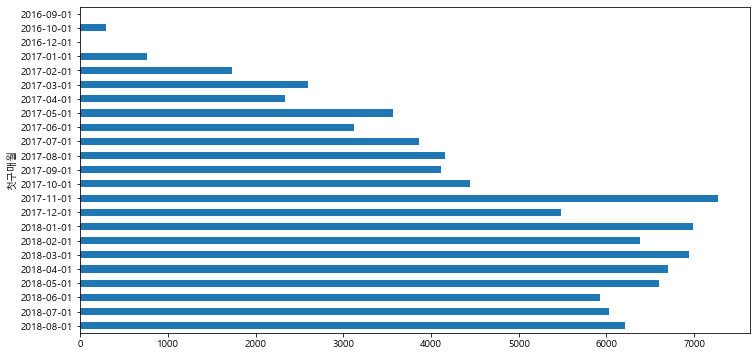

In [55]:
cohort_count[1].sort_index(ascending = False).plot.barh(figsize=(12, 6))

### 시각화 자료가 의미하는건 ,,,  2017년 10월이 런칭 1주년... 신규고객이 제일 많았음 -> 1주년 프로모션을 했을 것으로 예상됨

## 잔존율 구하기

In [56]:
# 가입한 달을 1로 나누면 잔존률을 구할 수 있음 => div !!!!
# div 를 통해 구하며 axis=0 으로 설정하면 첫 달을 기준으로 나머지 달을 나누게 됨
cohort_ratio = cohort_count.div(cohort_count[1], axis=0) * 100
cohort_ratio.round(2)

몇달째구매,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
첫구매월,,,,,,,,,,,,,,,,,,,,
2016-09-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-01,100.0,NaN,NaN,NaN,NaN,NaN,0.34,NaN,NaN,0.34,NaN,0.34,NaN,0.34,NaN,0.34,NaN,0.34,0.67,0.67
2016-12-01,100.0,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13,0.79,0.39,0.13,0.13,0.26,0.39,0.13,NaN
2017-02-01,100.0,0.23,0.29,0.12,0.40,0.12,0.23,0.17,0.17,0.23,0.12,0.29,0.17,0.17,0.12,0.06,0.06,0.23,NaN,NaN
2017-03-01,100.0,0.50,0.35,0.38,0.35,0.15,0.15,0.31,0.35,0.08,0.38,0.15,0.23,0.12,0.15,0.23,0.08,0.15,NaN,NaN
2017-04-01,100.0,0.60,0.21,0.17,0.30,0.26,0.34,0.30,0.30,0.17,0.26,0.09,0.09,0.04,0.09,0.09,0.17,NaN,NaN,NaN
2017-05-01,100.0,0.48,0.50,0.39,0.31,0.34,0.42,0.17,0.25,0.28,0.25,0.34,0.25,0.03,0.20,0.22,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.45,0.35,0.42,0.26,0.38,0.35,0.22,0.13,0.22,0.32,0.32,0.16,0.13,0.19,NaN,NaN,NaN,NaN,NaN


### 잔존율 시각화 

<AxesSubplot:xlabel='몇달째구매', ylabel='첫구매월'>

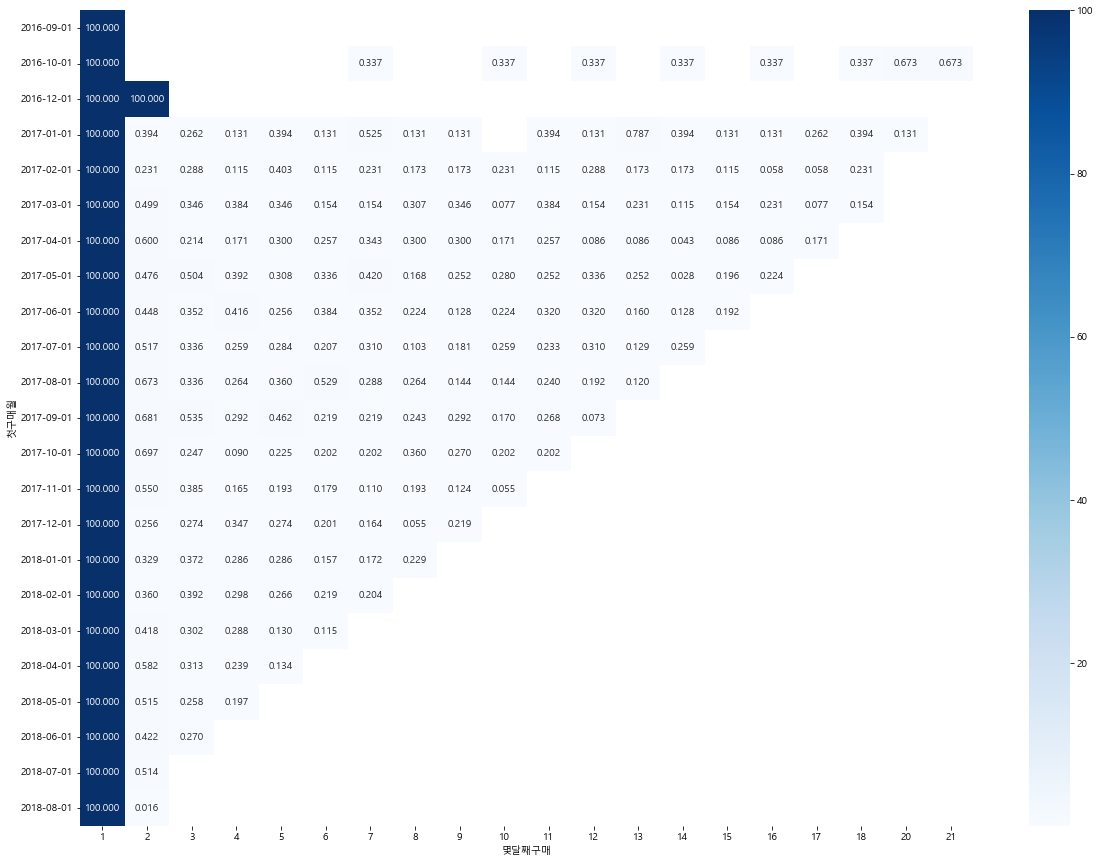

In [65]:
plt.figure(figsize=(20, 15))
sns.heatmap(data = cohort_ratio, annot = True,
           cmap = 'Blues',fmt = '.3f')

### - 히트맵 분석이 의미하는건 - 고객 잔존율 계속 떨어짐 == 리텐션 관리가 안된다는 뜻 